In [1]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures


num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)


68608000/68606236 [==============================] - 1s 0us/step
total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [0]:
# Define the training parameter and how many pixels of the input pictures. 
batch_size = 128
epochs = 15
IMG_HEIGHT = 10
IMG_WIDTH = 10

In [3]:
train_image_generator = ImageDataGenerator(rescale=1./255, rotation_range=45, horizontal_flip=True, zoom_range=0.5) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


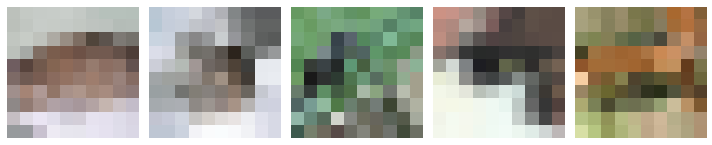

In [4]:
sample_training_images, _ = next(train_data_gen)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])


In [0]:
# Define how the structure of the model is.
model = Sequential([
    Conv2D(10, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),  
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(20, 3, padding='same', activation='relu'),  
    MaxPooling2D(),
    Conv2D(25, 3, padding='same', activation='relu'), 
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(300, activation='relu'),
    Dense(1)
])

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 10, 10, 10)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 10)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 10)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 20)          1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 20)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 25)          4525      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 25)          0

In [7]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 8s 516ms/step - loss: 0.6947 - accuracy: 0.4995 - val_loss: 0.6927 - val_accuracy: 0.4967
Epoch 2/15
15/15 [==============================] - 8s 506ms/step - loss: 0.6931 - accuracy: 0.5005 - val_loss: 0.6916 - val_accuracy: 0.4967
Epoch 3/15
15/15 [==============================] - 8s 508ms/step - loss: 0.6924 - accuracy: 0.4936 - val_loss: 0.6908 - val_accuracy: 0.5056
Epoch 4/15
15/15 [==============================] - 8s 502ms/step - loss: 0.6922 - accuracy: 0.5011 - val_loss: 0.6899 - val_accuracy: 0.4944
Epoch 5/15
15/15 [==============================] - 7s 495ms/step - loss: 0.6895 - accuracy: 0.5059 - val_loss: 0.6844 - val_accuracy: 0.4967
Epoch 6/15
15/15 [==============================] - 7s 495ms/step - loss: 0.6871 - accuracy: 0.5016 - val_loss: 0.6826 - val_accuracy: 0.4967
Epoch 7/15
15/15 [==============================] - 8s 502ms/step - loss

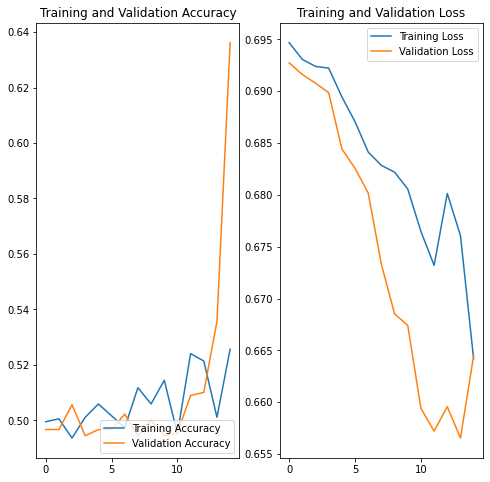

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
tflite_model = converter.convert()

open("CNN_model.tflite", "wb").write(tflite_model)

61564

In [10]:
def representative_dataset_gen():
  for image in sample_training_images:
    array = np.array(image)
    #array = np.expand_dims(array, axis = 2)
    array = np.expand_dims(array, axis = 0)
    #array = ((array / 127.5) - 1.0).astype(np.float32)
    yield ([array])


converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset_gen
tflite_model = converter.convert()

open("CNN_full_quantized.tflite", "wb").write(tflite_model)



21632

In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("CNN_2L_model_quantized.tflite", "wb").write(tflite_model)

20312

In [12]:
import os
basic_model_size = os.path.getsize("CNN_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("CNN_full_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 61564 bytes
Quantized model is 21632 bytes
Difference is 39932 bytes


In [13]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i CNN_full_quantized.tflite > CNN_full_quantized..cc
# Print the source file
!cat CNN_full_quantized..cc

Selecting previously unselected package xxd.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.3_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.3) ...
Setting up xxd (2:8.0.1453-1ubuntu1.3) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
unsigned char CNN_full_quantized_tflite[] = {
  0x08, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x36, 0xc0, 0xff, 0xff,
  0x03, 0x00, 0x00, 0x00, 0xf0, 0x53, 0x00, 0x00, 0xb4, 0x3f, 0x00, 0x00,
  0x9c, 0x3f, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x16, 0x00, 0x00, 0x00,
  0x88, 0x3f, 0x00, 0x00, 0x74, 0x3f, 0x00, 0x00, 0xa8, 0x3a, 0x00, 0x00,
  0x84, 0x3a, 0x00, 0x00, 0x60, 0x3a, 0x00, 0x00, 0xfc, 0x1c, 0x00, 0x00,
  0xb8, 0x1b, 0x00, 0x00, 0x94, 0x1a, 0x00, 0x00, 0x70, 0x13, 0x00, 0x00,
  0xcc, 0x01, 0x00, 0x00, 0x88, 0x01, 0x00, 0x00, 0x24, 0x01, 0x00, 0x00,
  0xb0, 0x00, 0x00, 0x00, 0xa4, 0x00, 0x00, 0x00, 0x90, 0x00, 0x00, 0x00,
  0x7c, 0x00, 0x00, 0x00, 0x68, 0x00, 0